In [1]:
import spintrace
import numpy as np
from astropy.table import vstack
import matplotlib.pylab as plt
plt.rcParams['font.family'] = 'serif'
import matplotlib.gridspec as gridspec

In [2]:
def paper_periodogram(broad, zoomed, xmin, xmax, best_freq, save_path=None):
    """
    Create a three-panel periodogram plot with window function overlay.

    Parameters
    ----------
    broad : array-like
        2D array where broad[0] = frequency, broad[1] = power, broad[3] = window function.
    zoomed : array-like
        2D array, same structure as broad, but zoomed-in version.
    xmin, xmax : list of float
        List of x-axis min and max for the 3 subplots.
    best_freq : float
        Best-fit frequency in cycles/day.
    save_path : str or None
        If provided, saves the figure to this path.
    """
    FF=10
    # Compute window effect scaling
    scale = np.array([
        broad[3][np.abs(freq - broad[0]).argmin()] / win
        for freq, win in zip(zoomed[0], zoomed[3])
    ])
    mean_scale = scale.mean()

    # Setup figure
    fig = plt.figure(figsize=[12, 3.75])
    gs = gridspec.GridSpec(3, 1, hspace=0.30)

    def add_subplot(row, xlim, band_text):
        ax = fig.add_subplot(gs[row, 0])
        ax.plot(24 / broad[0], broad[1], color='r', alpha=1.0,label='Data')
        ax.fill_between(24 / broad[0], broad[3] / mean_scale, 0, color='gray', alpha=0.5, label='Window effect')
        ax.axhline(0, color='k')
        ax.set_xlim(xlim)
        ax.set_ylim(0, 1)
        if row == 2:
            ax.axvline(24 / best_freq - 0.00015, linestyle=':', color='k')
            ax.axvline(24 / best_freq + 0.00015, linestyle=':', color='k')
            ax.set_xlabel('Rotational Period (hours)', fontsize=FF)
        if row == 0:
            ax.fill_between([xmin[1], xmax[1]], 0, 1, color='blue', alpha=0.2)
        elif row == 1:
            ax.fill_between([xmin[2], xmax[2]], 0, 1, color='blue', alpha=0.2)
        ax.set_ylabel('LS power', fontsize=FF)
        ax.set_yticks(np.arange(0, 0.80, 0.25))
        ax.tick_params(labelsize=FF)
        ax.text(0.015, 0.85, band_text, transform=ax.transAxes, fontsize=FF, ha='center', va='center')
        if row == 0:
            ax.legend(fontsize=FF, loc='upper right', ncol=2)

    # Add subplots A, B, C
    add_subplot(0, (xmin[0], xmax[0]), 'A)')
    add_subplot(1, (xmin[1], xmax[1]), 'B)')
    add_subplot(2, (xmin[2], xmax[2]), 'C)')
    
    if save_path:
        plt.savefig(save_path, format='jpg', dpi=300)
    plt.show()




# This is only required if you do not download the fits from Github

In [3]:
# # Initialize the downloader with CSV and output path
# downloader = spintrace.Downloader(
#     csv_file='Haumea/table_Haumea-system-barycenter20136108.csv', # Path to your metadata file
#     path_to_save_fits='Haumea/fits_tables/',     # Folder to save the FITS files
#     max_workers=5,                               # Number of parallel downloads
#     verbose=False
# )

# downloader.download_fits()

# Continue

In [4]:
fits_files = spintrace.get_files('Haumea/fits_tables/')

body = spintrace.Body(
    name="Haumea", 
    ephem_start_date="2018-03-24", 
    ephem_end_date="2025-07-01", 
    step="4h",      # Default step for retrieving ephemeris from Horizons
    location="I41", # ZTF IAU code
    use_cache=True) # When True uses already downloaded ephemeris, set False to download a new ephemeris

In [5]:
mpa = spintrace.MultiPhotometryAnalysis(
    fits_files=fits_files,              # ← list of FITS table files from ZTF
    body=body,                          # ← Haumea ephemerides interpolator
    colors={'g-r': 0.0,'r-i':0.0},      # ← Neutral or real color terms
    color_errs={'g-r': 0.0,'r-i':0.0},  # ← Corresponding uncertainties
    v_tol=1.0)                          # ← Magnitude tolerance for PSF matching
mpa.run_analysis(check_close_stars=True)

2025-10-03 10:39:39,086 - INFO - Found existing Gaia stars final file: Haumea/gaia_closeby_stars.fits	 Skipping Gaia query and loading existing results...
2025-10-03 10:39:39,165 - INFO - Removing rows where a Gaia star is ≤ 4" from the asteroid's expected position.


Filtered table has 1666 rows after filtering.


# Access to information not printed in the mpa.reduced_table
If user wants to see information regarding selected PSFs before continuing with the analysis it can use the following commands.

In [6]:
# This is how user can access all original information about the selected psf for a given filename.
meas = spintrace.Measurements(fits_path='Haumea/fits_tables/ztf_20180325356516_000580_zg_c04_o_q1_psfcat.fits', 
                              colors={'g-r': 0.0,'r-i':0.0}, color_errs={'g-r': 0.0,'r-i':0.0})
meas.mag_cal_table.colnames

['sourceid',
 'xpos',
 'ypos',
 'ra',
 'dec',
 'flux',
 'sigflux',
 'mag',
 'sigmag',
 'snr',
 'chi',
 'sharp',
 'flags',
 'mag_cal',
 'mag_cal_err',
 'mjd',
 'filter_code']

In [7]:
# This is how user can ontain the orbital values as downloaded from JPL system. 
body.ephemeris[0]

targetname,datetime_str,datetime_jd,H,G,solar_presence,lunar_presence,RA,DEC,RA_app,DEC_app,RA_rate,DEC_rate,AZ,EL,AZ_rate,EL_rate,sat_X,sat_Y,sat_PANG,siderealtime,airmass,magextinct,V,surfbright,illumination,illum_defect,sat_sep,sat_vis,ang_width,PDObsLon,PDObsLat,PDSunLon,PDSunLat,SubSol_ang,SubSol_dist,NPole_ang,NPole_dist,EclLon,EclLat,r,r_rate,delta,delta_rate,lighttime,vel_sun,vel_obs,elong,elongFlag,alpha,lunar_elong,lunar_illum,sat_alpha,sunTargetPA,velocityPA,OrbPlaneAng,constellation,TDB-UT,ObsEclLon,ObsEclLat,NPole_RA,NPole_DEC,GlxLon,GlxLat,solartime,earth_lighttime,RA_3sigma,DEC_3sigma,SMAA_3sigma,SMIA_3sigma,Theta_3sigma,Area_3sigma,RSS_3sigma,r_3sigma,r_rate_3sigma,SBand_3sigma,XBand_3sigma,DoppDelay_3sigma,true_anom,hour_angle,alpha_true,PABLon,PABLat
str25,str17,float64,float64,float64,str1,str1,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,int64,float64,str1,int64,int64,int64,int64,int64,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str2,float64,float64,float64,float64,float64,float64,float64,str3,float64,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
136108 Haumea (2003 EL61),2018-Mar-24 00:00,2458201.5,0.15,0.15,*,m,213.576039325,16.894717549,213.793629132,16.809409277,-1.94874,1.42929,35.212870566,-31.872237415,746.62,434.68,-537094.25,55798.19,302.161,4.3039838393,999.0,--,17.266,--,99.99674,--,520765.6,*,--,--,--,--,--,62.58,0.0,--,--,204.415417,27.996229,50.50553858919,-0.3643325,49.6890524023255,-10.6816927,413.25124755,3.8293689,26.4466548,144.6571,/L,0.6571,118.3,42.9794,34.545,242.186,288.75,-0.47324,Boo,69.185638,205.1499094,28.4956132,--,--,9.108156,68.27886,16.1022854887,0.000354,0.004,0.003,0.00394,0.00296,-10.989,3.66e-05,0.005,6284.1403,3.76e-05,0.6,2.16,0.041923,204.599,-9.94892477,0.6546,204.6527,28.2472


In [8]:
mpa.reduced_table['filename'][0]

np.str_('ztf_20180325356516_000580_zg_c04_o_q1_psfcat.fits')

In [9]:
# This is how user can ontain the exact orbital parameters (after propagating the ephemeris to image instant). Notice that ra and dec here are from ephemeris.  
mpa._get_source_entry('Haumea/fits_tables/ztf_20180325356516_000580_zg_c04_o_q1_psfcat.fits',ephemeride=True)

{'RA': array(213.55714123),
 'DEC': array(16.9075452),
 'alpha': array(0.64519615),
 'delta': array(49.68099987),
 'r': array(50.50525311),
 'lighttime': array(413.1842767),
 'V': array(17.26393134),
 'JD_LT_corr': np.float64(2458202.5695942747)}

# Data visualization and solar phase corrections

Here I provide step-by-step code to visualize and correct data by solar phase angle, for each filter separately. 
Please refer to Hektor' example to a more concise code looping through the three filters.

In [10]:
plots = spintrace.Plots(table = mpa.reduced_table,
                        ast_name='Haumea',
                        fontsize=16)

In [11]:
string = f"{body.name}/plots/{body.name}"
string

'Haumea/plots/Haumea'

In [12]:
np.median(mpa.reduced_table['mag_cal_err'])

np.float32(0.035000004)

## Filter g-sdss

Figure saved to Haumea/plots/Haumea_general_g.jpg


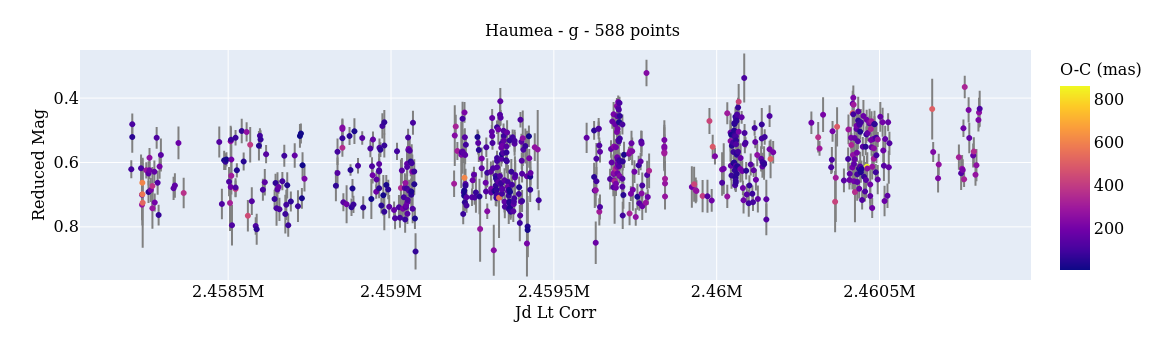

In [13]:
plots.general(filter_code='g',
              show_yerr=True,
              show_color=True,
              # ylim=[0.7,0.2],
              # bkg=False,
              save_path=string+'_general_g.jpg')

In [14]:
popt, fit_label, popt2, fit_label_binned = mpa.fit_phase_curve(filter_code='g',
                                                               phase_bin=0.1)


plots.phase_curve(filter_code='g',
                  popt=popt, 
                  fit_label=fit_label, 
                  popt2=popt2, 
                  fit_label_binned=fit_label_binned,
                  show_yerr=True,
                  show_color=True,
                  ylim=[1.0,0.2],
                  bkg=False,
                  save_path=string+'_phase_curve_g_linear.jpg')

Figure saved to Haumea/plots/Haumea_phase_curve_g_linear.jpg


In [15]:
# Correct g-sdds filter data by solar phase angle effects.
table_g = mpa.fit_phase_curve(filter_code='g',model='linear',H=0.54,B=0.09)

Fit result for g filter using original data and linear model:
Original data linear fit: H = 0.54, beta = 0.09


## Filter i-sdss

Figure saved to Haumea/plots/Haumea_general_i.jpg


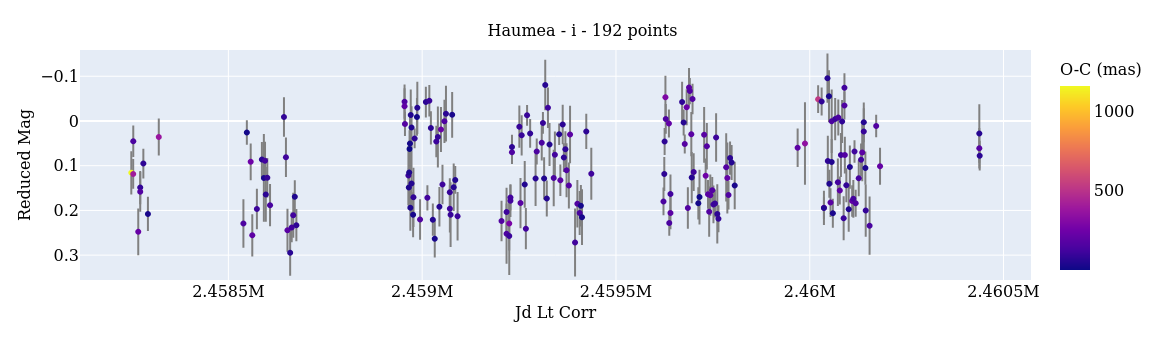

In [16]:
plots.general(filter_code='i',
              show_yerr=True,
              show_color=True,
              save_path=string+'_general_i.jpg')

In [17]:
popt, fit_label, popt2, fit_label_binned = mpa.fit_phase_curve(filter_code='i',
                                                               phase_bin=0.1)

plots.phase_curve(filter_code='i',
                  popt=popt, 
                  fit_label=fit_label, 
                  popt2=popt2, 
                  fit_label_binned=fit_label_binned,
                  show_yerr=True,
                  show_color=True,
                  ylim=[0.4,-0.2],
                  bkg=False,
                  save_path=string+'_phase_curve_i_linear.jpg')

Figure saved to Haumea/plots/Haumea_phase_curve_i_linear.jpg


In [18]:
# Correct i-sdds filter data by solar phase angle effects.
table_i = mpa.fit_phase_curve(filter_code='i',model='linear',H=0.0,B=0.13)

Fit result for i filter using original data and linear model:
Original data linear fit: H = 0.0, beta = 0.13


## Filter r-sdss

Figure saved to Haumea/plots/Haumea_general_r.jpg


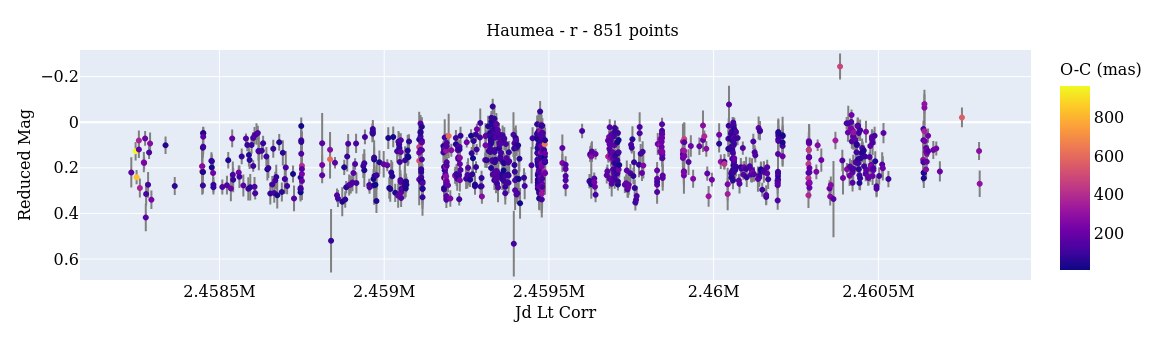

In [19]:
plots.general(filter_code='r',
              show_yerr=True,
              show_color=True,
              save_path=string+'_general_r.jpg')

In [20]:
popt, fit_label, popt2, fit_label_binned = mpa.fit_phase_curve(filter_code='r',
                                                               phase_bin=0.1)
plots.phase_curve(filter_code='r',
                  popt=popt, 
                  fit_label=fit_label, 
                  popt2=popt2, 
                  fit_label_binned=fit_label_binned,
                  show_yerr=True,
                  show_color=True,
                  ylim=[0.7,-0.35],
                  bkg=False,
                  save_path=string+'_phase_curve_r_linear.jpg')

Figure saved to Haumea/plots/Haumea_phase_curve_r_linear.jpg


In [21]:
# Correct r-sdds filter data by solar phase angle effects.
table_r = mpa.fit_phase_curve(filter_code='r',model='linear',H=0.07,B=0.13)

Fit result for r filter using original data and linear model:
Original data linear fit: H = 0.07, beta = 0.13


# Combining SDSS filters

In [22]:
merged_table = vstack([table_g,table_r,table_i])
len(merged_table)

1631

Figure saved to Haumea/plots/Haumea_phase_corrected_all.jpg


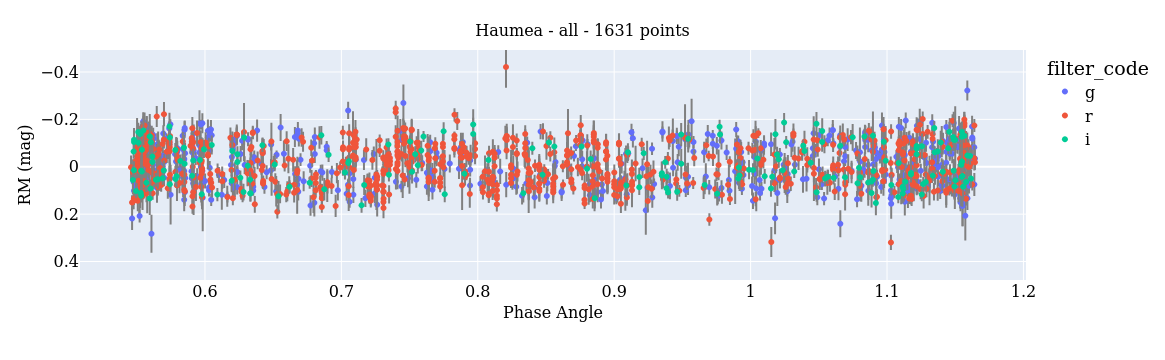

In [23]:
plots.general(x_column='phase_angle',
              y_column='phase_corrected_mag',
              show_yerr=True,
              show_color=True,
              color_column='filter_code',
              table=merged_table,
              save_path=string+'_phase_corrected_all.jpg')

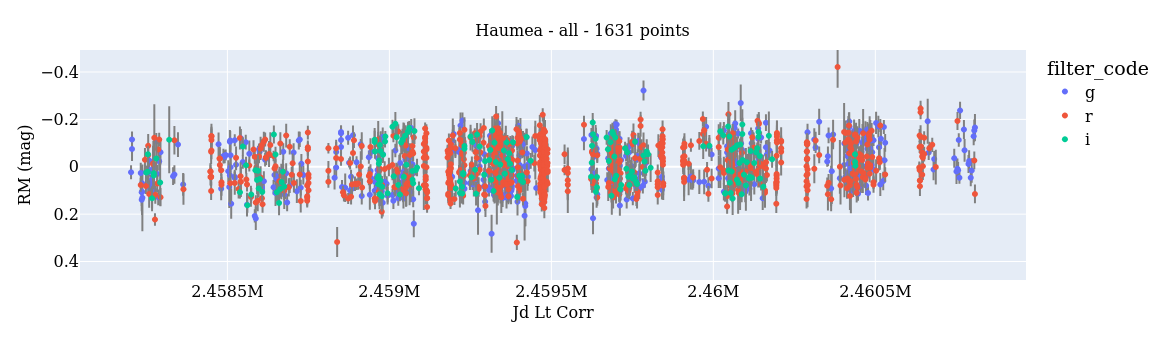

In [24]:
plots.general(x_column='jd_lt_corr',
              y_column='phase_corrected_mag',
              show_yerr=True,
              show_color=True,
              color_column='filter_code',
              table=merged_table,
              # save_path=string+'_phase_corrected_all.jpg'
             )

# Rotational analysis 

In [25]:
# Here I used a loop to be able to run the broad and constrained rotational search at once. 
P_ref=3.915341
min_freq = [4,6.1]
max_freq = [12,6.16]
n_terms =  [2,2]
delta_t =  [None,0.00015] # Not a fit, just to plot a vertical line in the periodogram
peaks =    [False,False]#
n_shuffle = [None,None]#
samples_per_peak = [None,400]#
freq = []
power = []
f_win = []
p_win = []
rotational_analysis =[]

for i in range(len(n_terms)):
    # Initiate the module
    ra = spintrace.RotationalAnalysis(table=merged_table,
                                               P_ref=P_ref,
                                               f_min=min_freq[i],
                                               f_max=max_freq[i],
                                               n_term=n_terms[i]) 
    # Performs the Lomb-Scargle search
    f,p,fr,po = ra.lomb_scargle_fit(asteroid=body.name, 
                                         filter_code=None,
                                         use_magerr=True,
                                         delta_t = delta_t[i],
                                         legend=True,
                                         samples_per_peak=samples_per_peak[i],
                                         peaks = peaks[i],
                                         n_shuffle = n_shuffle[i],
                                         use_window_function=True,
                                         save_path=string+'_periodogram'+str(i)+'.jpg'
                                        )
    freq.append(f)
    power.append(p)
    f_win.append(fr)
    p_win.append(po)
    rotational_analysis.append(ra)

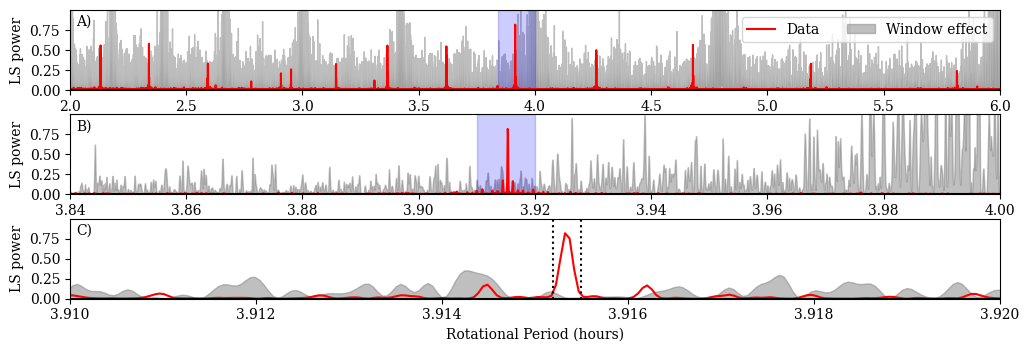

In [26]:
data0= np.column_stack((freq[0], power[0], f_win[0], p_win[0]))
data0 = data0.T
data1= np.column_stack((freq[1], power[1], f_win[1], p_win[1]))
data1 = data1.T

paper_periodogram(
    broad=data0,
    zoomed=data1,
    xmin=[2.0,3.84,3.91],
    xmax=[6.0,4.0,3.92],
    best_freq=ra.best_freq,
    save_path=string+'paper.jpg'
)


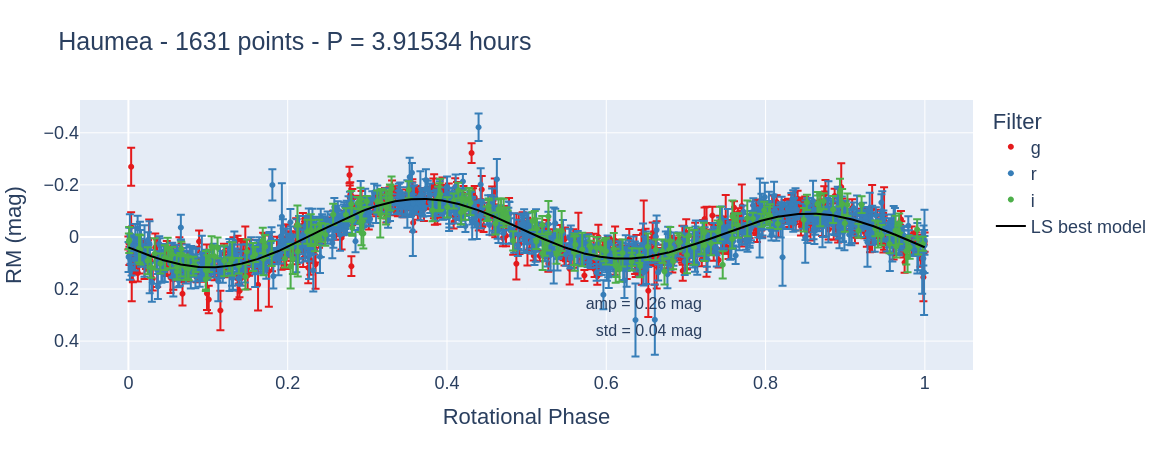

In [27]:
# Plotting an interactive figure of the folded data
rotational_analysis = rotational_analysis[1]
model_params = rotational_analysis.compute_phased_model(JD = np.array(rotational_analysis.table['jd_lt_corr']), 
                                                        mag = np.array(rotational_analysis.table['phase_corrected_mag']),
                                                        best_freq = rotational_analysis.best_freq ,
                                                        epoch0=2458202.5695942747 # 2018-03-25 01:40:13 first valid data point
                                                       )
            
df = plots.folded_lightcurve(asteroid=body.name,
                                table = rotational_analysis.table,
                                filter_codes=np.array(rotational_analysis.table['filter_code']),
                                JD=np.array(rotational_analysis.table['jd_lt_corr']),  
                                model_params=model_params, 
                                corrected_mag=np.array(rotational_analysis.table['phase_corrected_mag']),
                                mag_err=np.array(rotational_analysis.table['mag_cal_err']),
                                best_freq = rotational_analysis.best_freq, 
                                save_path=string+'_lightcurve_folded.jpg', 
                                epoch_zero = 2458202.5695942747, # 2018-03-25 01:40:13 first valid data point
                                show_fig=True)

In [29]:
round(24/rotational_analysis.best_freq,6)

np.float64(3.915342)

In [30]:
df['residuals'] = df['Magnitude']-df['model_mag']

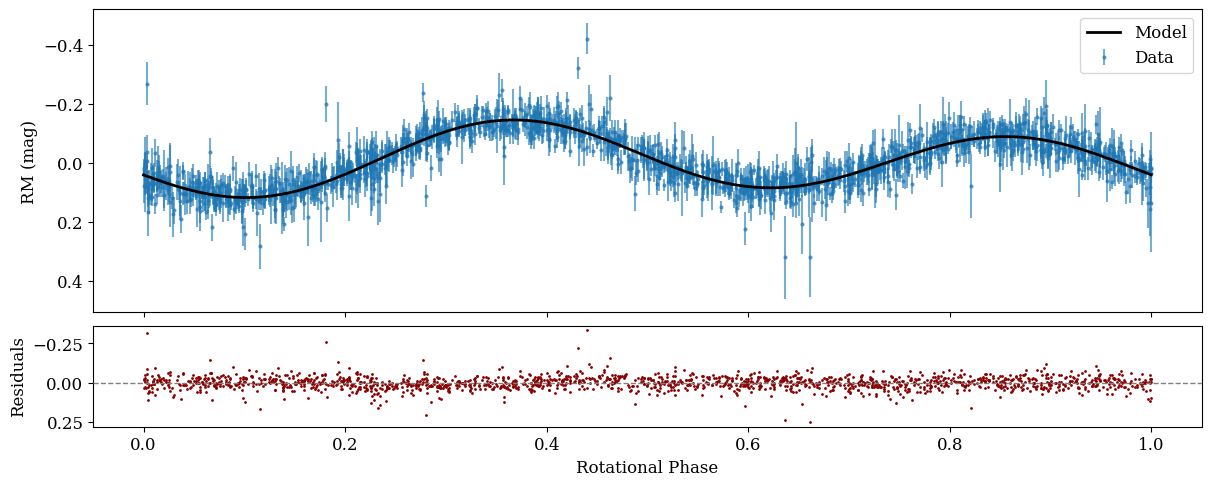

In [32]:
# Save a plot of the folded data
plots.plot_folded_lightcurve_with_residuals(df,save_path=string+'folded_light_curve_with_residuals.jpg',fontsize=12)

In [33]:
round(np.std(df['residuals']),3)

np.float64(0.042)

In [34]:
# corrects the initially calculated reduced magnitudes by the rotational model (black line in previous figure)
tab = rotational_analysis.get_detrended_magnitudes()

In [35]:
# Fits the linear phase curve in the just corrected data using multiple simulations to obtain the reported error bars of H and beta
abs_mags, abs_mags_err, slope, slope_err = [],[],[],[]
f_list = ['g','r','i']
for item in f_list:
    mask = tab['filter_code'] == item
    df = tab[mask].to_pandas()
    df.to_csv(f'Haumea_{item}.csv')
    
    x_data = df['phase_angle']
    y_data = df['mag_corr_by_rot']
    y_noise = df['mag_cal_err']
    
    h, h_err, beta, beta_err = mpa.simulate_phase_curve(x_data, y_data, y_noise)
    abs_mags.append(h) 
    abs_mags_err.append(h_err)
    slope.append(beta) 
    slope_err.append(beta_err)

100%|██████████████████████████████████| 10000/10000 [00:00<00:00, 17845.66it/s]


In [37]:
for i in range(3):
    print(f"H = {round(abs_mags[i], 4)} +/- {round(abs_mags_err[i], 4)} mag")
    print(f"Beta = {round(slope[i], 4)} +/- {round(slope_err[i], 4)} \n")

H = 0.5282 +/- 0.0062 mag
Beta = 0.1054 +/- 0.0072 

H = 0.0855 +/- 0.0064 mag
Beta = 0.112 +/- 0.0075 

H = -0.0048 +/- 0.0137 mag
Beta = 0.1278 +/- 0.0153 



Figure saved to Haumea/plots/Haumea_general_g_corr.jpg


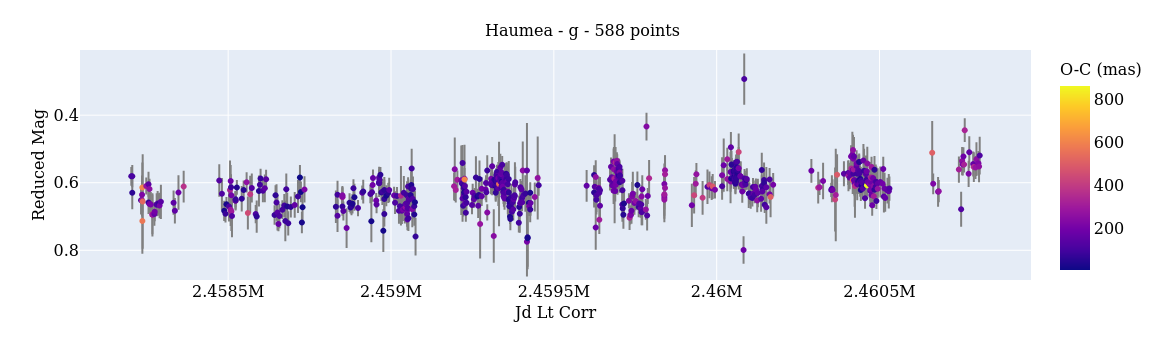

In [38]:
# Reduced magnitudes after correcting by the rotational model
plots.general(filter_code='g',
              show_yerr=True,
              show_color=True,
              table=tab,
              y_column='mag_corr_by_rot',
              save_path=string+'_general_g_corr.jpg')

Figure saved to Haumea/plots/Haumea_general_r_corr.jpg


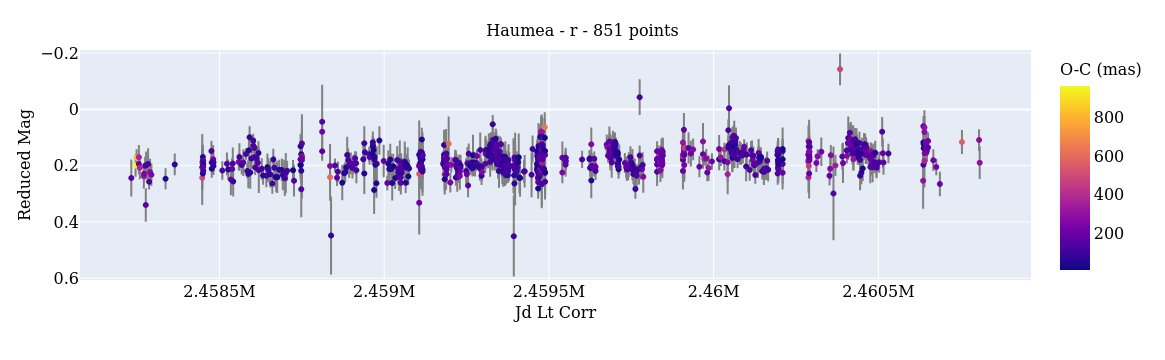

In [39]:
plots.general(filter_code='r',
              show_yerr=True,
              show_color=True,
              table=tab,
              y_column='mag_corr_by_rot',
              save_path=string+'_general_r_corr.jpg')

Figure saved to Haumea/plots/Haumea_general_i_corr.jpg


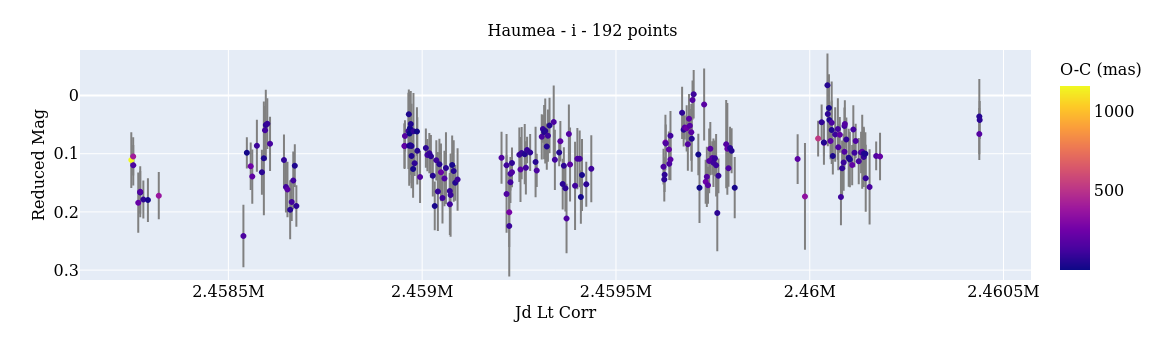

In [40]:
plots.general(filter_code='i',
              show_yerr=True,
              show_color=True,
              table=tab,
              y_column='mag_corr_by_rot',
              save_path=string+'_general_i_corr.jpg')

# Final phase curves plots

In [41]:
popt, fit_label, popt2, fit_label_binned = mpa.fit_phase_curve(filter_code='g',
                                                               phase_bin=0.1,
                                                               table=tab,
                                                               mag_col='mag_corr_by_rot')


plots.phase_curve(filter_code='g',
                  popt=popt, 
                  fit_label=fit_label, 
                  popt2=popt2, 
                  fit_label_binned=fit_label_binned,
                  show_yerr=True,
                  show_color=True,
                  table=tab,
                  y_column='mag_corr_by_rot',
                  ylim=[1.0,0.2],
                  bkg=False,
                  bkg_data=True,
                  label=False,
                  width = 1050,
                  height= 325,
                  save_path=string+'_phase_curve_g_linear_corr.jpg')

Figure saved to Haumea/plots/Haumea_phase_curve_g_linear_corr.jpg


In [42]:
popt, fit_label, popt2, fit_label_binned = mpa.fit_phase_curve(filter_code='i',
                                                               phase_bin=0.1,
                                                               table=tab,
                                                               mag_col='mag_corr_by_rot')


plots.phase_curve(filter_code='i',
                  popt=popt, 
                  fit_label=fit_label, 
                  popt2=popt2, 
                  fit_label_binned=fit_label_binned,
                  show_yerr=True,
                  show_color=True,
                  table=tab,
                  y_column='mag_corr_by_rot',
                  ylim=[0.4,-0.2],
                  bkg=False,
                  bkg_data=True,
                  label=False,
                  width = 1050,
                  height= 325,
                  save_path=string+'_phase_curve_i_linear_corr.jpg')

Figure saved to Haumea/plots/Haumea_phase_curve_i_linear_corr.jpg


In [43]:
popt, fit_label, popt2, fit_label_binned = mpa.fit_phase_curve(filter_code='r',
                                                               phase_bin=0.1,
                                                               table=tab,
                                                               mag_col='mag_corr_by_rot')


plots.phase_curve(filter_code='r',
                  popt=popt, 
                  fit_label=fit_label, 
                  popt2=popt2, 
                  fit_label_binned=fit_label_binned,
                  show_yerr=True,
                  show_color=True,
                  table=tab,
                  y_column='mag_corr_by_rot',
                  ylim=[0.7,-0.35],
                  bkg=False,
                  bkg_data=True,
                  label=False,
                  width = 1050,
                  height =325,
                  save_path=string+'_phase_curve_r_linear_corr.jpg')

Figure saved to Haumea/plots/Haumea_phase_curve_r_linear_corr.jpg


In [44]:
# Discounting the new H and Beta from data to obtain the residuals
table_g_corr = mpa.fit_phase_curve(filter_code='g',
                            model='linear',
                            H=0.5284,B=0.1052,
                            table=tab,
                            mag_col='mag_corr_by_rot')

Fit result for g filter using original data and linear model:
Original data linear fit: H = 0.5284, beta = 0.1052


In [45]:
table_i_corr = mpa.fit_phase_curve(filter_code='i',
                            model='linear',
                            H=-0.005,B=0.128,
                            table=tab,
                            mag_col='mag_corr_by_rot')

Fit result for i filter using original data and linear model:
Original data linear fit: H = -0.005, beta = 0.128


In [46]:
table_r_corr = mpa.fit_phase_curve(filter_code='r',
                            model='linear',
                            H=0.0854,B=0.112,
                            table=tab,
                            mag_col='mag_corr_by_rot')

Fit result for r filter using original data and linear model:
Original data linear fit: H = 0.0854, beta = 0.112


In [47]:
merged_table_corr = vstack([table_g_corr,table_r_corr,table_i_corr]) # 
len(merged_table_corr)

1631

Figure saved to Haumea/plots/Haumea_phase_corrected_all_last.jpg


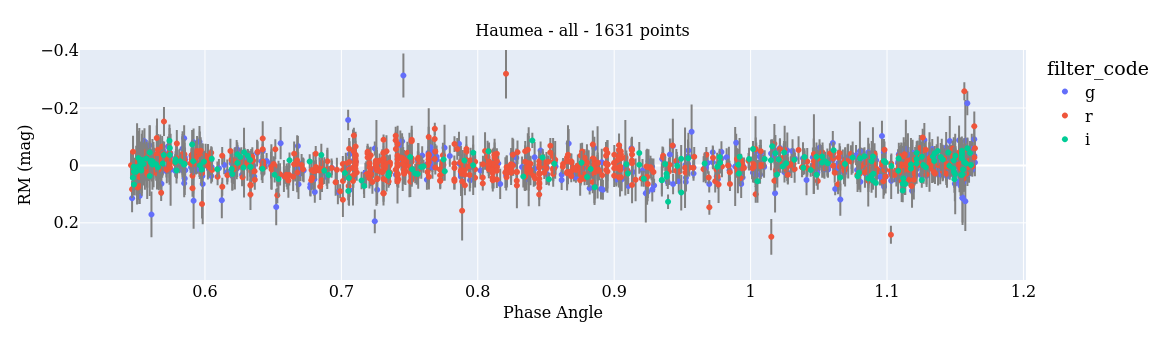

In [48]:
plots.general(x_column='phase_angle',
              y_column='phase_corrected_mag',
              show_yerr=True,
              show_color=True,
              color_column='filter_code',
              table=merged_table_corr,
              save_path=string+'_phase_corrected_all_last.jpg')

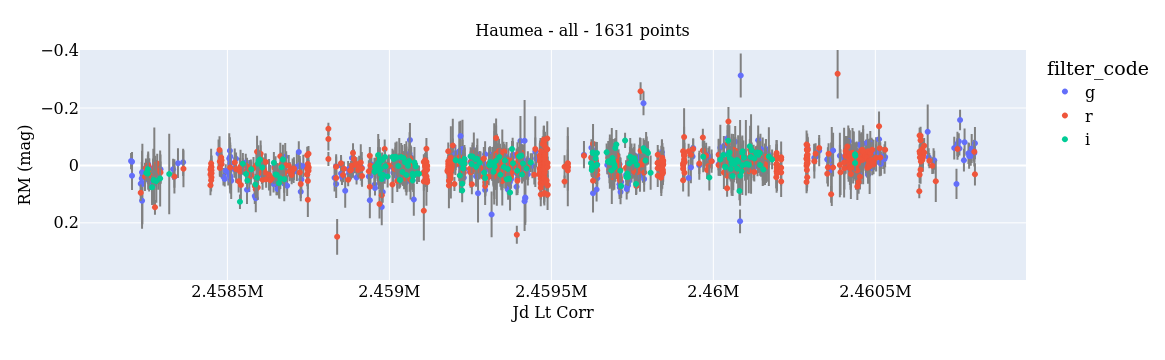

In [49]:
plots.general(x_column='jd_lt_corr',
              y_column='phase_corrected_mag',
              show_yerr=True,
              show_color=True,
              color_column='filter_code',
              table=merged_table_corr,
              # save_path=string+'_phase_corrected_all_by_time.jpg'
             )

# Any periodicity in the residuals?

Hi'iaka orbital period kind of appears in the periodogram but the signal is to small to be conclusive. 

In [50]:
rotational_analysis2 = spintrace.RotationalAnalysis(table=merged_table_corr, 
                                                P_ref=1187.088,f_min=0.01,f_max=0.08,n_term=1)

a,b,c,d = rotational_analysis2.lomb_scargle_fit(asteroid='Hiiaka', 
                                     filter_code=None,
                                     use_magerr=True,
                                     save_path=string+'_Hiiaka_periodogram_broad.jpg',
                                     legend=True, 
                                     # delta_t=6,
                                     samples_per_peak=400,
                                      peaks=True, 
                                      pn=3,
                                      y_max=0.2,
                                      n_shuffle=10,
                                      use_window_function=True,
                                      table=rotational_analysis2.table)

1: Period = 588.726122 hours, Power = 0.081463
2: Period = 551.442256 hours, Power = 0.048204
3: Period = 630.764253 hours, Power = 0.031490


In [51]:
model_params_res = rotational_analysis2.compute_phased_model(JD = np.array(rotational_analysis2.table['jd_lt_corr']), 
                                                        mag = np.array(rotational_analysis2.table['phase_corrected_mag']),
                                                        best_freq = rotational_analysis2.best_freq ,
                                                        epoch0=2458202.5695942747 # 2018-03-25 01:40:13 first valid data point
                                                       )
            
df_res = plots.folded_lightcurve(asteroid='Residuals',
                                table = rotational_analysis2.table,
                                filter_codes=np.array(rotational_analysis2.table['filter_code']),
                                JD=np.array(rotational_analysis2.table['jd_lt_corr']),  
                                model_params=model_params_res, 
                                corrected_mag=np.array(rotational_analysis2.table['phase_corrected_mag']),
                                mag_err=np.array(rotational_analysis2.table['mag_cal_err']),
                                best_freq = rotational_analysis2.best_freq, 
                                save_path=string+'_Hiiaka_lightcurve_t2.jpg', 
                                shev = None,
                                epoch_zero=2458202.5695942747, # 2018-03-25 01:40:13 first valid data point
                                show_fig=True)

In [52]:
df_res['residuals'] = df_res['Magnitude']-df_res['model_mag']

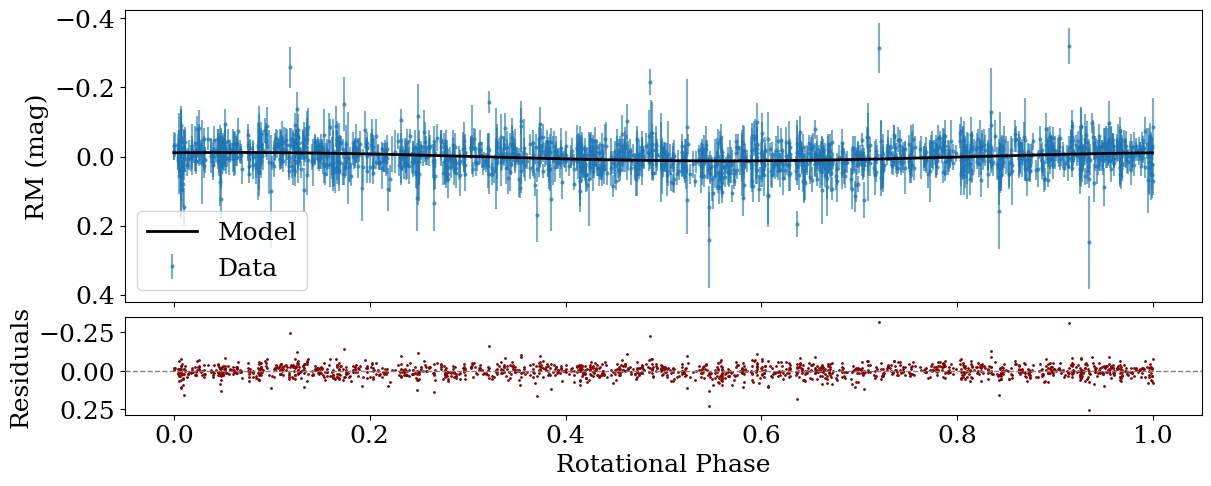

In [53]:
plots.plot_folded_lightcurve_with_residuals(df_res,save_path=string+'Hiiaka_folded_light_curve_with_residuals.jpg')

In [54]:
def paper_periodogram_zoomed(broad, best_freq, zoom_ranges, full_xlim=None, ylim=1.0,
                              save_path=None, error=1, shuffle_value=0.024):
    """
    Plots a periodogram with one broad view and one zoomed-in panel.

    Parameters
    ----------
    broad : array-like
        2D array where broad[0] = frequency, broad[1] = power, broad[3] = window function.
    best_freq : float
        Best-fit frequency (in cycles/day).
    zoom_ranges : list of tuple
        List of 1 or more tuples: each (xmin, xmax) in hours for zoom panels.
    full_xlim : tuple or list of float, optional
        X-axis range for top panel (broad view). If None, inferred from data.
    ylim : float
        Maximum y-axis value.
    save_path : str or None
        If provided, saves the figure to this path.
    """
    FF = 10  # font size

    fig = plt.figure(figsize=[12, 3.75])
    gs = gridspec.GridSpec(2, 1, hspace=0.3)

    def add_subplot(row, xlim, band_text, highlights=None, show_x=False, show_lines=False):
        ax = fig.add_subplot(gs[row, 0])
        ax.plot(24 / broad[0], broad[1], color='r', alpha=1.0, label='Data')
        ax.fill_between(24 / broad[0], broad[3], 0, color='gray', alpha=0.5, label='Window effect')
        ax.axhline(0, color='k')
        ax.set_xlim(xlim)
        ax.set_ylim(0, ylim)
        ax.set_ylabel('LS Power', fontsize=FF)
        ax.tick_params(labelsize=FF)
        ax.text(0.03, 0.90, band_text, transform=ax.transAxes, fontsize=FF, ha='left', va='center')

        if highlights:
            for x0, x1, color in highlights:
                ax.fill_betweenx([0, ylim], x0, x1, color=color, alpha=0.2)

        if show_lines:
            ax.axvline((24 / best_freq) - error[0], linestyle=':', color='k')
            ax.axvline((24 / best_freq) + error[0], linestyle=':', color='k')

        if show_x:
            ax.set_xlabel('Rotational Period (hours)', fontsize=FF)

        if row == 0:
            ax.axhline(shuffle_value, linestyle='--', color='darkblue')
            ax.legend(fontsize=FF, loc='upper right', ncol=2)

    # Define default full_xlim if not given
    if full_xlim is None:
        full_xlim = (np.min(24 / broad[0]), np.max(24 / broad[0]))

    # Plot top panel (broad view) with both zoom ranges highlighted
    highlight_colors = ['blue', 'green']
    highlights = [
        (zoom_ranges[0][0], zoom_ranges[0][1], highlight_colors[0]),
        # (zoom_ranges[1][0], zoom_ranges[1][1], highlight_colors[1])
    ]
    add_subplot(row=0, xlim=full_xlim, band_text='A)', highlights=highlights)

    # Plot only one zoomed-in panel (use first zoom_range)
    add_subplot(row=1, xlim=zoom_ranges[0], band_text='B)', show_x=True, show_lines=True)

    if save_path:
        plt.savefig(save_path, format='jpg', dpi=300)
    plt.show()


In [55]:
Data0 = np.column_stack((a, b, c, d))
Data0 = Data0.T

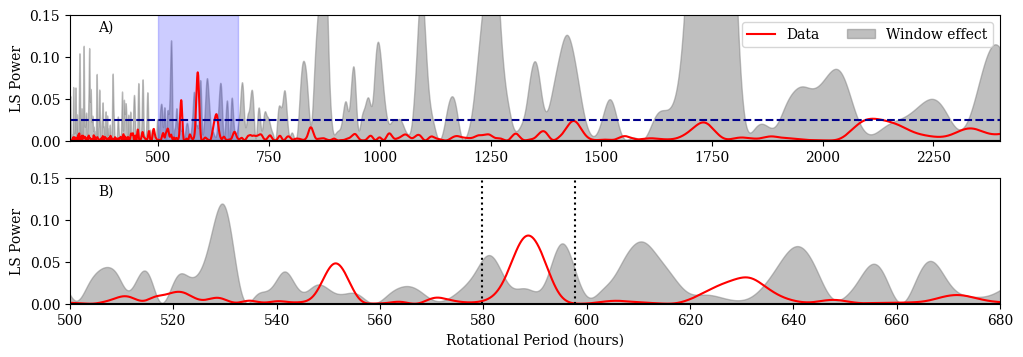

In [56]:
paper_periodogram_zoomed(
        broad=Data0,
        # full_xlim =[300,1700],
        best_freq=rotational_analysis2.best_freq,  # cycles/day
        zoom_ranges=[(500, 680), (1050, 1300)],  # periods in hours
        ylim=0.15,
        error = [9,14],
        save_path=string+'Hiiaka_paper.jpg'
)

In [57]:
Data0

array([[0.01      , 0.01000096, 0.01000192, ..., 0.07999842, 0.07999938,
        0.08000034],
       [0.00782637, 0.00781094, 0.00779576, ..., 0.00242636, 0.00244137,
        0.00245633],
       [0.01      , 0.01000096, 0.01000192, ..., 0.07999842, 0.07999938,
        0.08000034],
       [0.11085433, 0.11102442, 0.11119049, ..., 0.03291711, 0.03282374,
        0.03273043]], shape=(4, 72941))

In [62]:
np.savetxt('Fig6.dat',Data0.T,fmt="%.4f",header="frequency power freq_window power_window")

In [97]:
dic = {'jd_lt_corr':'Time corrected by LT (JD)',
       'phase_angle':'Solar phase angle (deg)',
       'mag_cal':'PS1 magnitudes (mag)',
       'mag_cal_err': 'PS1 mag uncertainties (mag)',
       'filter_code': 'SDSS filter',
       'separation (mas)':'offset (mas)',
       'reduced_mag': 'initial reduced magnitudes (mag)',
       'mag_corr_by_rot': 'rotationally corrected reduced magnitudes',
       'phase_corrected_mag':'Haumea relative magnitude (mag)',
       'filename':'filename'
       }

In [101]:
hiiaka = rotational_analysis2.table.to_pandas()
haumea = rotational_analysis.table.to_pandas()
hiiaka = hiiaka['phase_corrected_mag']
haumea = haumea[['jd_lt_corr', 'phase_angle', 'mag_cal','mag_cal_err','filter_code',
                 'separation (mas)','reduced_mag','mag_corr_by_rot','phase_corrected_mag','filename']]
haumea.insert(9,'Residuals relative magnitude (mag)',hiiaka)
haumea = haumea.rename(columns=dic)

In [102]:
haumea.to_csv('Haumea_result.csv',index=False)